# Нахождение характеристик

$\dot{x} = c(x); x(0) = a;$

$ t = T(X(t, a)) = \int\limits_a^{X(t, a)}\frac{dx}{c(x)}$

## Аналитическое решение

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.misc import derivative
from sympy import *

#from sympy import integrate, solve, diff, Derivative
#from sympy import Symbol, symbols, Function, cos, Eq, sinh, tan, exp


### Явное интегрирование и решение алгербраического уравнения

,Task,Equation,Solution,Derivate by a
0,dx/dt = 3/x,X**2/6 - a**2/6 - t = 0,"X(t, a) = -sqrt(a**2 + 6*t)",X'a = -a/sqrt(a**2 + 6*t)
1,x(0) = -1,,x(0) = -1,a = -1


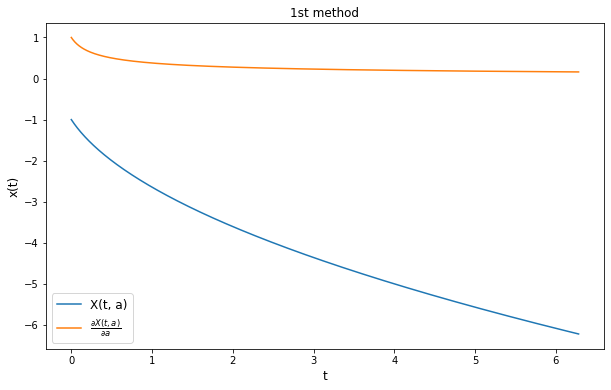

In [14]:
x = Symbol('x')
X = Symbol("X")
a = Symbol('a')
t = Symbol('t')
c = 3/x

a_ = -1
T = integrate(1/c, x)

eqn = f"t = {T}"

eq = T.subs(x, X) - T.subs(x, a) - t
X = solve(eq, X)
X0 = X[0].subs([(t, 0), (a, a_)])
if X0 == a_:
    i = 0
else:
    i = 1
X = X[i]
solution = f"X(t, a) = {X}"
diff_a = f"X'a = {X.diff(a)}"


steps = pd.DataFrame({"Task": [f"dx/dt = {c}", f"x(0) = {a_}"],
                      "Equation": [str(eq) + " = 0", ''],
                      "Solution": [solution, f"x(0) = {X.subs([(t, 0), (a, a_)])}"],
                      "Derivate by a": [diff_a, f"a = {a_}"]
                     })
display(steps)

#X = X(t, a)
f = lambdify((t, a), X, "numpy")

# dX(t, a)/da
X_a = lambdify((t, a), X.diff(a), "numpy")

#plotting
fig, ax = plt.subplots(figsize = (10, 6))

# X(t, a) plot
t = np.linspace(0, 2*np.pi, 1000)
y = f(t, a_)
ax.plot(t, y, label = "X(t, a)")

#dX(t, a)/da plot
y_a = X_a(t, a_)
ax.plot(t, y_a, label=r"$\frac{\partial X(t, a)}{\partial a}$")
ax.set_xlabel('t', size="large")
ax.set_ylabel('x(t)', size='large')
ax.set_title("1st method")
ax.legend(fontsize = "large")
plt.show()

## Решение дифференциального уравнения аналитически встроенным методом

-1.0*sqrt(a**2 + 6*t)

,Task,Solution,Derivate by a
0,dx/dt = 3/x(t),-1.0*sqrt(a**2 + 6*t),-1.0*a/sqrt(a**2 + 6*t)
1,x(0) = -1,x(0) = 1.00000000000000,a = -1


-2.0


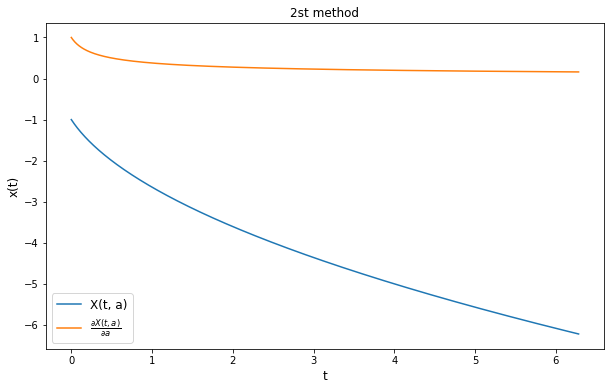

In [11]:
a, t = symbols("a, t")
x = Function("x")
c = 3/x(t)
sgn = np.round(a_/abs(a_), 1)
eq = Derivative(x(t), t) - c
X = sgn*dsolve(eq, x(t), ics={x(0) : a}).rhs
display(X)

X_ = diff(X, a)
a_ = a_
prt = pd.DataFrame({"Task": [f"dx/dt = {str(c)}", f"x(0) = {a_}"],
                      "Solution": [X, f"x(0) = {sgn*X.subs([(t, 0), (a, a_)])}"],
                      "Derivate by a": [X_, f"a = {a_}"]
                     })
display(prt)

#X = X(t, a)
f = lambdify((t, a), X, "numpy")
print(f(0.5, -1))
# dX(t, a)/da
X_a = lambdify((t, a), X_, "numpy")
#plotting
fig, ax = plt.subplots(figsize = (10, 6))

# X(t, a) plot
t = np.linspace(0, 2*np.pi, 1000)
y = f(t, a_)
ax.plot(t, y, label = "X(t, a)")

#dX(t, a)/da plot
y_a = X_a(t, a_)
ax.plot(t, y_a, label=r"$\frac{\partial X(t, a)}{\partial a}$")
ax.set_xlabel('t', size="large")
ax.set_ylabel('x(t)', size='large')
ax.set_title("2st method")
ax.legend(fontsize = "large")
plt.show()

### Численное решение встроенным методом

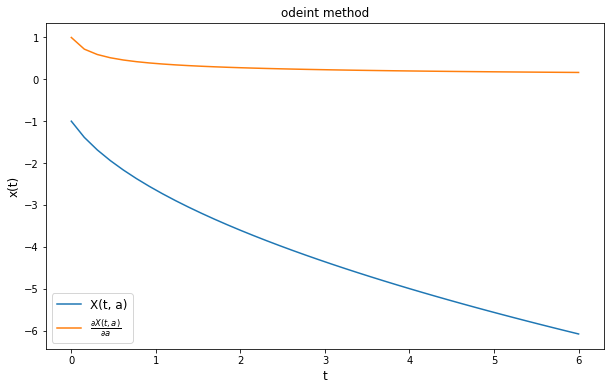

In [10]:
def c(x):
    return 3/x

def dxdt(x, t):
    return c(x)

h=10**(-4)
x0 =a_
x = odeint(dxdt, x0, t)
x1 = odeint(dxdt, x0+h, t)
dxda = (x1-x)/h

#plotting
fig, ax = plt.subplots(figsize = (10, 6))
# X(t, a) plot
ax.plot(t, x, label = "X(t, a)")
#dX(t, a)/da plot
ax.plot(t, dxda, label=r"$\frac{\partial X(t, a)}{\partial a}$")
ax.set_xlabel('t', size="large")
ax.set_ylabel('x(t)', size='large')
ax.set_title("odeint method")
ax.legend(fontsize = "large")
plt.show()

решение дфференциального уравнения разностной схемой


## Самописные решения

### Решение алгебраического уравнения
$\dot{x} = 3/x; x(0) = a;$

$ t = T(X(t, a)) = \int\limits_a^{X(t, a)}\frac{xdx}{3} = \frac{X^2(t, a)}{6} - \frac{a^2}{6}$

для решения методом касательных построим функцию $G(x, t) = T(x) - t, t-fix$

<ipython-input-9-2ee205e95d38>:8: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  f_derivative = derivative(f, x)


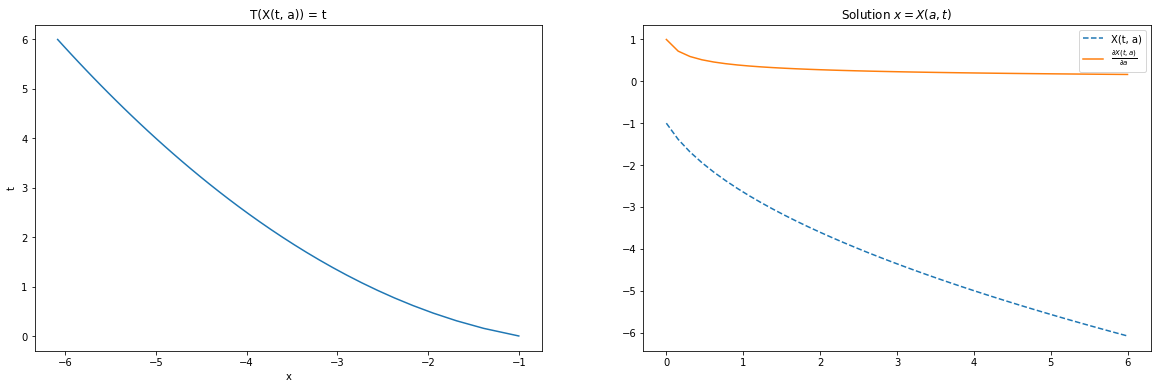

In [9]:
#метод касательных
def tangent_method(func, x0, t, tol=1e-6, max_iter=100):
    def f(x):
        return func(x, x0, t)
    x = x0
    for i in range(max_iter):
        f_x = f(x)
        f_derivative = derivative(f, x)
        x_new = x - f_x / f_derivative

        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return None
    
def T(x,a, t):
    return x**2/6 - a**2/6 - t

def solve(f, a, t):
    X = []
    for t1 in t:
        X.append(tangent_method(f, a, t1))
    X = np.transpose(np.array(X))
    return X
t = np.linspace(0, 6, 40)
x = solve(T, a_, t)
#print(x)

def X(t, a):
    return tangent_method(T, a, t)
    
#Численное дифференцирование по параметру 
h = 10**(-4)
def diff_a(f, t, h, a):
    return (f(t, a+h)-f(t, a))/h
dXda = [diff_a(X, t1, h, a_) for t1 in t]

fig, (ax, ay) = plt.subplots(1, 2, figsize=(20, 6))
ax.set_title(r"T(X(t, a)) = t")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.plot(x, t)

ay.set_title(r"Solution $x = X(a, t)$")
ay.plot(t, x, "--", label="X(t, a)")
#производная по а
ay.plot(t, dXda, label=r"$\frac{\partial X(t, a)}{\partial a}$")
ay.legend()
plt.show()

### Решение разностной схемой

$t_n = hn; x_n = x(t_n);$

$ x_{n+1} = hc(x_n) + x_n; x_0 = a$

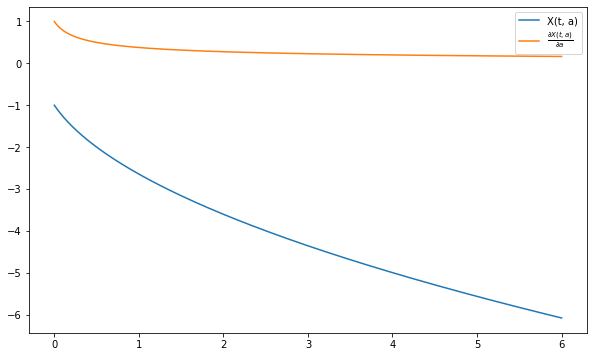

In [6]:
def c(x):
    return 3/x

x0 = a_
h = 10**(-4)
T_limits = (0, 6)
def solve(x0, h, lims):
    t_min = np.min(lims)
    T_max = np.max(lims)
    N = int((T_max - t_min)/h) + 1
    X = np.zeros(N)
    T = np.zeros(N)
    T[0] = 0
    X[0] = x0
    x_cur = X[-1]
    t_cur = h
    for i in range(1, N):
        T[i] = t_cur
        X[i] = h*c(X[i-1]) + X[i-1]
        t_cur +=h
    return T, X
T, X = solve(x0, h, T_limits)
T, X1 = solve(x0+h, h, T_limits)
dXda = (X1-X)/h
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(T, X, label="X(t, a)")
ax.plot(T, dXda, label=r"$\frac{\partial X(t, a)}{\partial a}$")
ax.legend()
plt.show()